# Project Code

In [2]:
#imports 
import os 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [75]:
path = os.getcwd() + '/data/cleanedRecipeData.csv'

data = pd.read_csv(path, header= 0)
print(data.shape)
data['ones'] = np.ones(data.shape[0])
X = data[['ones', 'OG','FG','ABV','IBU','Color']].values
y = data[['StyleID']].values
y = y.ravel()
print(X.shape, y.shape)

(66582, 18)
(66582, 6) (66582,)


## Logistic Regression

### Split Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

print(X_train.shape)
print(X_test.shape)

(56594, 6)
(9988, 6)


### Scale Features

In [4]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

### Build Model

In [5]:
model = LogisticRegression(max_iter = 4500)
model.fit(X_train_Scaled, y_train)


LogisticRegression(max_iter=4500)

In [6]:
y_pred = model.predict(X_test_Scaled)

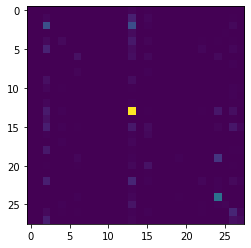

In [7]:
conf_matrix = np.array(confusion_matrix(y_test, y_pred))
df = pd.DataFrame(conf_matrix)
#print(df)
plt.imshow(conf_matrix)

### Performance

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00       294
           3       0.26      0.47      0.33      1124
           4       0.32      0.07      0.11        92
           5       0.26      0.15      0.19       332
           6       0.00      0.00      0.00       370
           7       0.39      0.31      0.34       310
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00        68
          10       0.08      0.01      0.02       179
          11       0.00      0.00      0.00       106
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        84
          14       0.53      0.84      0.65      2585
          15       0.00      0.00      0.00       125
          16       0.14      0.10      0.12       640
          17       0.00      0.00      0.00       103
          18       0.35    

C:\Users\deanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\deanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X)

print(pca.components_)
print(pca.explained_variance_)

pca = PCA(n_components=2)
projected = pca.fit_transform(X)

[[ 0.00000000e+00 -5.58245993e-05  5.10198542e-06  1.35944034e-02
   9.99725264e-01  1.90941401e-02]
 [ 0.00000000e+00  2.85499610e-03  1.16663650e-03  3.83794672e-02
  -1.96032877e-02  9.99066172e-01]]
[1730.8458702  147.3570818]


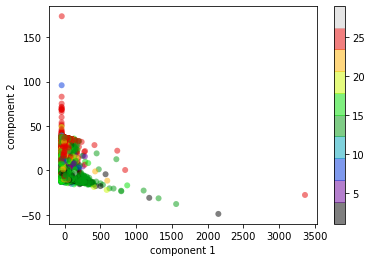

In [10]:
names = data[['Style']].values
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# Random Forest

In [11]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
accuracy=model.score(X_test,y_test)
print("Accuracy: ",accuracy)

Accuracy:  0.4853824589507409


# Narrowing Down the Styles

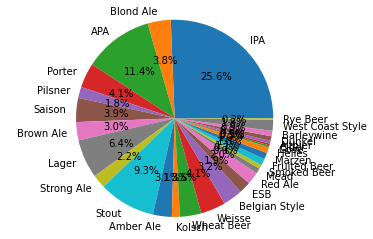

In [12]:
styles = {}
for beer in data['Style']:
        try:
            styles[beer] += 1
        except:
            styles[beer] = 1

fig1, ax1 = plt.subplots()
ax1.pie(styles.values(), labels=styles.keys(),autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

IPA, APA, Stout, and Lager make up about 52.7% of the data

# Load data with only select styles

In [32]:
path = os.getcwd() + '/data/popularRecipeData.csv'

data2 = pd.read_csv(path, header= 0)
print(data2.shape)
data2['ones'] = np.ones(data2.shape[0])
X2 = data2[['ones', 'OG','FG','ABV','IBU','Color']].values
y2 = data2[['StyleID']].values
y2_names = data2[['Style']].values #output more readable with names instead of number labels
y2 = y2.ravel()
y2_names = y_names.ravel()
print(X2.shape, y2.shape)

(35046, 18)
(35046, 6) (35046,)


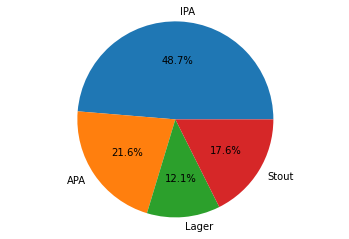

In [77]:
styles = {}
for beer in data2['Style']:
        try:
            styles[beer] += 1
        except:
            styles[beer] = 1

fig1, ax1 = plt.subplots()
ax1.pie(styles.values(), labels=styles.keys(),autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## PCA

In [14]:
pca2 = PCA(n_components=2)
pca2.fit(X2)

print(pca2.components_)
print(pca2.explained_variance_)

pca2 = PCA(n_components=2)
projected2 = pca2.fit_transform(X2)

[[-0.00000000e+00 -3.56901435e-04 -7.63914530e-05  1.26115251e-02
   9.99899373e-01 -6.48531851e-03]
 [ 0.00000000e+00  3.35699552e-03  1.31169217e-03  3.86161509e-02
   5.99521548e-03  9.99229633e-01]]
[2416.75629486  185.59576882]


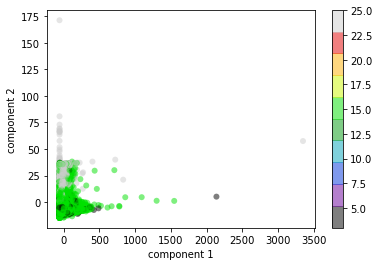

In [15]:
plt.scatter(projected2[:, 0], projected2[:, 1],
            c=y2, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

## Split into train and test

In [4]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_names, test_size=0.15, random_state=0)

print(X2_train.shape)
print(X2_test.shape)

(29789, 6)
(5257, 6)


In [5]:
scaler = StandardScaler()
X2_train_Scaled = scaler.fit_transform(X2_train)
X2_test_Scaled = scaler.transform(X2_test)

## Logistic Regression

In [12]:
model = LogisticRegression(max_iter = 4500)
model.fit(X2_train_Scaled, y2_train)
accuracy=model.score(X2_test_Scaled,y2_test)
print("Accuracy: ",accuracy)

Accuracy:  0.710481263077801


In [19]:
y2_pred = model.predict(X2_test_Scaled)

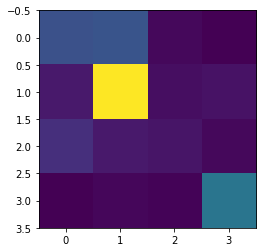

In [20]:
conf_matrix = np.array(confusion_matrix(y2_test, y2_pred))
df = pd.DataFrame(conf_matrix)
#print(df)
plt.imshow(conf_matrix)

In [21]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.55      0.47      0.51      1176
         IPA       0.74      0.87      0.80      2541
       Lager       0.45      0.20      0.28       618
       Stout       0.85      0.93      0.89       922

    accuracy                           0.71      5257
   macro avg       0.65      0.62      0.62      5257
weighted avg       0.68      0.71      0.69      5257



## Random Forest

In [13]:
model = RandomForestClassifier()
model.fit(X2_train_Scaled,y2_train)
accuracy=model.score(X2_test_Scaled,y2_test)
print("Accuracy: ",accuracy)

Accuracy:  0.7743960433707437


In [14]:
y2_pred = model.predict(X2_test_Scaled)

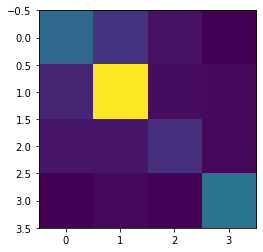

In [15]:
conf_matrix = np.array(confusion_matrix(y2_test, y2_pred))
df = pd.DataFrame(conf_matrix)
#print(df)
plt.imshow(conf_matrix)

In [16]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.67      0.62      0.65      1176
         IPA       0.81      0.86      0.83      2541
       Lager       0.61      0.50      0.55       618
       Stout       0.89      0.92      0.90       922

    accuracy                           0.77      5257
   macro avg       0.74      0.73      0.73      5257
weighted avg       0.77      0.77      0.77      5257



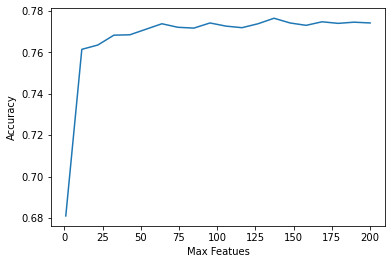

0.776488491535096 13


In [53]:
scores = []
for i in range(20):
    #print(i)
    model = RandomForestClassifier(n_estimators = i*10+1)
    model.fit(X2_train_Scaled,y2_train)
    accuracy=model.score(X2_test_Scaled,y2_test)
    scores.append(accuracy)


x = np.linspace(1,200,20)
plt.plot(x,scores)
plt.xlabel("Max Featues")
plt.ylabel("Accuracy")


plt.show()
print(max(scores), scores.index(max(scores))*10+1)

In [17]:
model = RandomForestClassifier(n_estimators = 131)
model.fit(X2_train_Scaled,y2_train)
accuracy=model.score(X2_test_Scaled,y2_test)
print("Accuracy: ",accuracy)

Accuracy:  0.7757276012935134


In [19]:
y2_pred = model.predict(X2_test_Scaled)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.67      0.62      0.64      1176
         IPA       0.81      0.86      0.83      2541
       Lager       0.62      0.50      0.55       618
       Stout       0.89      0.93      0.91       922

    accuracy                           0.78      5257
   macro avg       0.74      0.73      0.73      5257
weighted avg       0.77      0.78      0.77      5257



## SVM

In [80]:
model = SVC(C = 1, gamma = 'auto')
model.fit(X2_train_Scaled, y2_train)
accuracy = model.score(X2_test_Scaled,y2_test)
accuracy

0.761270686703443

In [10]:
scores = []
x = []
for i in range(20):
    print(i)
    c = 10**((i-10)/10)
    x.append(c)
    model = SVC(C = c, gamma = 'auto')
    model.fit(X2_train_Scaled,y2_train)
    accuracy=model.score(X2_test_Scaled,y2_test)
    scores.append(accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


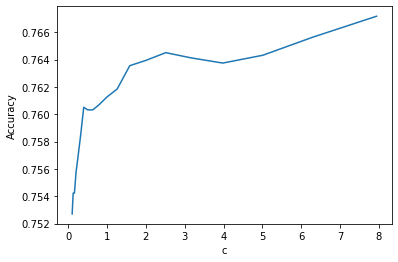

0.7671675860757086 7.943282347242816


In [11]:
plt.plot(x,scores)
plt.xlabel("c")
plt.ylabel("Accuracy")


plt.show()
print(max(scores), 10**((scores.index(max(scores))-10)/10))

In [20]:
model = SVC(C = 7.943282347242816, gamma = 'auto')
model.fit(X2_train_Scaled, y2_train)
accuracy = model.score(X2_test_Scaled,y2_test)
accuracy

0.7671675860757086

In [21]:
y2_pred = model.predict(X2_test_Scaled)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.62      0.66      0.64      1176
         IPA       0.82      0.85      0.83      2541
       Lager       0.62      0.36      0.46       618
       Stout       0.87      0.95      0.90       922

    accuracy                           0.77      5257
   macro avg       0.73      0.70      0.71      5257
weighted avg       0.76      0.77      0.76      5257



## Voting Classifier

In [28]:
lr = LogisticRegression(max_iter = 4500)
rf = RandomForestClassifier(n_estimators = 131)
svm = SVC(C = 7.943282347242816, gamma = 'auto')

voting_model = VotingClassifier(estimators = [('lr', lr), ('rf', rf), ('svc', svm)], voting = 'hard')
voting_model.fit(X2_train_Scaled, y2_train)
accuracy=voting_model.score(X2_test_Scaled,y2_test)
accuracy

0.7662164732737302

In [29]:
y2_pred = voting_model.predict(X2_test_Scaled)

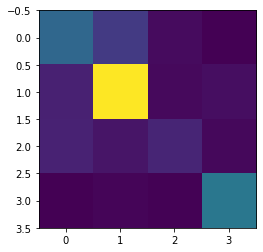

In [94]:
conf_matrix = np.array(confusion_matrix(y2_test, y2_pred))
df = pd.DataFrame(conf_matrix)
#print(df)
plt.imshow(conf_matrix)

In [30]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.64      0.62      0.63      1176
         IPA       0.80      0.86      0.83      2541
       Lager       0.63      0.37      0.47       618
       Stout       0.86      0.94      0.90       922

    accuracy                           0.77      5257
   macro avg       0.73      0.70      0.71      5257
weighted avg       0.76      0.77      0.76      5257



## MLP

In [6]:
model = MLPClassifier(hidden_layer_sizes= (15),activation='relu')
model.fit(X2_train_Scaled, y2_train)
accuracy=model.score(X2_test_Scaled,y2_test)
accuracy

C:\Users\deanp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7728742628875784

In [7]:
y2_pred = model.predict(X2_test_Scaled)

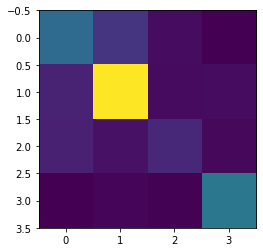

In [8]:
conf_matrix = np.array(confusion_matrix(y2_test, y2_pred))
df = pd.DataFrame(conf_matrix)
#print(df)
plt.imshow(conf_matrix)

In [9]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         APA       0.64      0.65      0.64      1176
         IPA       0.82      0.86      0.84      2541
       Lager       0.61      0.40      0.49       618
       Stout       0.87      0.94      0.91       922

    accuracy                           0.77      5257
   macro avg       0.74      0.71      0.72      5257
weighted avg       0.76      0.77      0.77      5257

